<a href="https://colab.research.google.com/github/stutisehgal/MachineLearning/blob/master/StartUps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on R&D, Administration and Marketing spend as integer type features and Location State as categorical type feature ; predict investment profit for company


Importing libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing dataset

In [0]:
dataset=pd.read_csv('50_Startups.csv')
X=dataset.iloc [ : , : -1 ].values  #independent features variable matrix
y=dataset.iloc [ : , -1 ].values    #dependent target output matrix

In [105]:
dataset.head(10) #to know the column labels of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [106]:
dataset.tail() #to know the row index of last entry in the dataset ie the total number of elements

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [107]:
dataset.shape #to know the number of rows and columns ie total number of elements in the dataset

(50, 5)

Checking and Handling Missing Values

In [108]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Encoding categorical value in State column

Avoid dummy variable trap!!!

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
'''from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
X[ : ,3] = label.fit_transform( X[ : ,3])
encoder=OneHotEncoder(categorical_features=[3])
X=encoder.fit_transform(X).toarray()'''



'from sklearn.preprocessing import LabelEncoder,OneHotEncoder\nlabel=LabelEncoder()\nX[ : ,3] = label.fit_transform( X[ : ,3])\nencoder=OneHotEncoder(categorical_features=[3])\nX=encoder.fit_transform(X).toarray()'

Splitting dataset into training set and test set

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X , y , test_size=0.2 , random_state=0)
print(y_test) #since dataset has 50 values in each column, test set will have 10 values in each column

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


Feature Scaling

In [111]:
from sklearn.preprocessing import StandardScaler
ss_X=StandardScaler()
X_train = ss_X.fit_transform( X_train )
X_test = ss_X.fit_transform( X_test )
print(X_train)
print(X_test)


[[-0.82  1.73 -0.73 -0.35 -0.79  0.1 ]
 [-0.82 -0.58  1.36 -0.56 -1.48  0.03]
 [-0.82  1.73 -0.73  0.08  0.8  -0.55]
 [ 1.22 -0.58 -0.73 -0.55  1.33  0.07]
 [-0.82  1.73 -0.73  0.43 -0.36  0.75]
 [-0.82  1.73 -0.73  1.27  0.86  0.99]
 [-0.82  1.73 -0.73  1.05  1.28  0.44]
 [-0.82 -0.58  1.36 -1.53  0.03 -1.62]
 [-0.82 -0.58  1.36 -1.54 -2.77 -1.64]
 [-0.82 -0.58  1.36 -0.13  1.14 -0.77]
 [-0.82 -0.58  1.36  0.93 -0.03  0.48]
 [-0.82  1.73 -0.73 -0.21 -0.3  -0.9 ]
 [ 1.22 -0.58 -0.73 -0.18  0.23 -1.26]
 [ 1.22 -0.58 -0.73  0.14 -0.07  0.5 ]
 [ 1.22 -0.58 -0.73 -1.04 -1.05 -0.44]
 [ 1.22 -0.58 -0.73  0.1  -0.37  0.78]
 [-0.82 -0.58  1.36 -1.22  0.15 -1.35]
 [-0.82 -0.58  1.36  1.06  0.98  0.89]
 [ 1.22 -0.58 -0.73  0.44  0.47  0.41]
 [ 1.22 -0.58 -0.73 -0.15  0.62 -0.52]
 [-0.82 -0.58  1.36  1.3  -0.91  1.3 ]
 [-0.82 -0.58  1.36  0.5   0.84  0.65]
 [ 1.22 -0.58 -0.73 -0.93 -0.19 -0.24]
 [ 1.22 -0.58 -0.73 -1.55 -0.25 -1.27]
 [ 1.22 -0.58 -0.73  1.97  1.08  1.96]
 [-0.82  1.73 -0.73  0.48

Apply multiple linear regression

Multiple linear regression class algorithm already takes care of dummy variable trap and feature selection of significant features with higher 'p' value that affect the target output y

y= c + m1x1 + m2x2 + m3x3 + ... +mnxn

In [112]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#object of class
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
lr.intercept_

109446.44724999998

In [114]:
coeff_df = pd.DataFrame({'Coefficient':lr.coef_})  
coeff_df

,Coefficient
0,15.526639
1,-401.658486
2,348.694671
3,35726.287742
4,851.301634
5,4519.882777


Predicting test set results

In [115]:
#predict() method is used to make test set predictions
y_pred=lr.predict(X_test)
#y_pred stores the predicted value of test set target output
np.set_printoptions(precision=2) #numpy helps to deiplay predicted value with a precision of 2 decimal points as the actual target output y values
y_pred #10 values of test set are predicted 
#calculated value of y_pred is compared to the actual values of the target output in the test dataset to find accuracy and calculate errors

array([ 91323.42, 125533.99, 125324.5 ,  57801.  , 177454.91, 106980.49,
        53174.37,  86571.52, 104724.77, 165575.52])

Calculate errors--also called Cost Function

compare value obtained of y_pred by multiple Linear Regression to the actual value of the target output column values in the test dataset to find errors and accuracy of model

In [116]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,103282.38,91323.415530
1,144259.40,125533.987590
2,146121.95,125324.497087
3,77798.83,57800.996398
4,191050.39,177454.913691
5,105008.31,106980.485282
6,81229.06,53174.370487
7,97483.56,86571.519365
8,110352.25,104724.769864
9,166187.94,165575.517205


In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)
r_score = r2_score(y_test, y_pred)
print('Accuracy:',r_score*100)
mae = mean_absolute_error(y_test, y_pred)
print('Mean squared error:',mae)


Mean squared error: 245301357.77848524
Accuracy: 80.81922196372635
Mean squared error: 13225.394806343398


Since r2_score value is 93% accuracy is really high for our prediction model and hence it can be deployed.

Visualising training dataset results

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

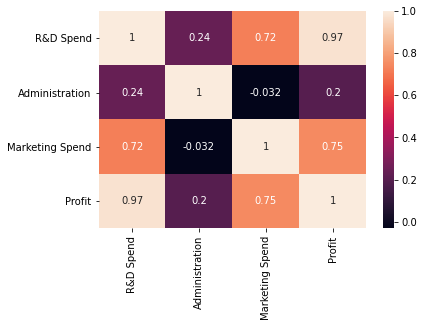

In [125]:
# Let's plot a correlation matrix of all independent features variables in our dataset
sns.heatmap(dataset.corr(),annot=True)


Visualising test dataset results

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


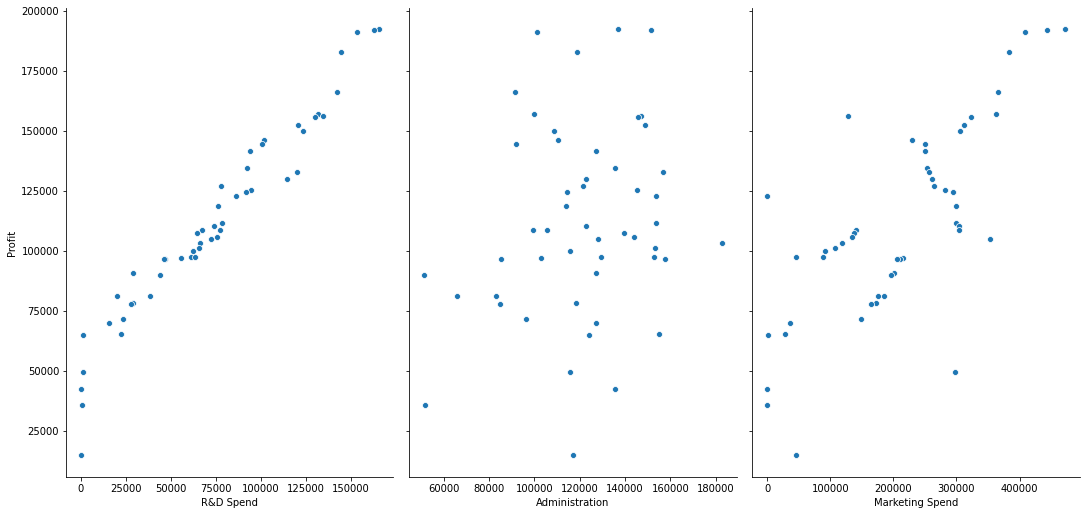

In [124]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars='Profit',size=7, aspect=0.7, kind='scatter')
#            dataset            independent features columns     dependent target size     aspect     kind of plot